In [32]:
import os
from setretrieval.utils.utils import pickload, get_deterministic_hash
from tqdm import tqdm
from setretrieval.datagen.generate_setdata import chunks_to_inds
from datasets import Dataset, DatasetDict
from statistics import mean
import random
import matplotlib.pyplot as plt

In [24]:
gd = DatasetDict.load_from_disk("../propercache/data/colbert_training/gemini_gutenbergtrain")

In [31]:
gd

DatasetDict({
    train: Dataset({
        features: ['query', 'positive', 'negative'],
        num_rows: 27001
    })
    test: Dataset({
        features: ['query', 'positive', 'negative'],
        num_rows: 3001
    })
})

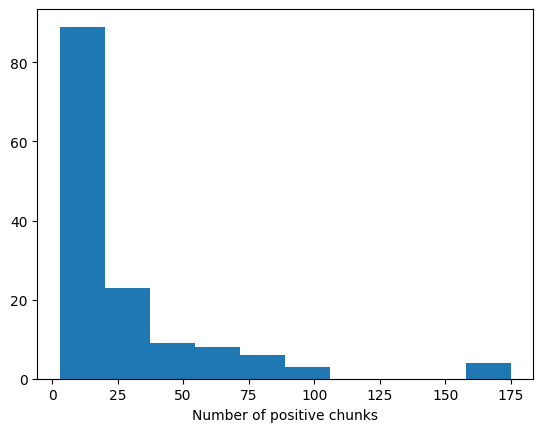

In [38]:
# given an eval set, print query, and then 3 random positives chunks
path = "../propercache/data/evalsets/gutenberg_newpipetest"
evaldata = Dataset.load_from_disk(path)

def print_query(evaldata, ind): 
    rc = random.choices(evaldata[ind]['pos_chunks'], k=3)
    print("QUERY: ", evaldata[ind]['question'])
    for i, r in enumerate(rc):
        print("POSITIVE CHUNK ", i+1)
        print(r['text'], "\n")

plt.hist([len(r['pos_chunks']) for r in evaldata])
plt.xlabel("Number of positive chunks")
plt.show()

In [21]:
print_query(evaldata, 0)

QUERY:  Title: Backup in gene regulatory networks explains differences between binding and knockout results Abstract: The complementarity of gene expression and protein–DNA interaction data led to several successful models of biological systems. However, recent studies in multiple species raise doubts about the relationship between these two datasets. These studies show that the overwhelming majority of genes bound by a particular transcription factor (TF) are not affected when that factor is knocked out. Here, we show that this surprising result can be partially explained by considering the broader cellular context in which TFs operate. Factors whose functions are not backed up by redundant paralogs show a fourfold increase in the agreement between their bound targets and the expression levels of those targets. In addition, we show that incorporating protein interaction networks provides physical explanations for knockout effects. New double knockout experiments support our conclusion

In [4]:
gendata = os.listdir("../propercache/cache/gendata")
gendata = [gd for gd in gendata if "passagesearchtrain_v2" in gd]

In [5]:
def add_basedir_hash2names(basef, usedict={}):
    fs = os.listdir("../" + basef)
    for f in fs:
        # print(basef + f)
        usedict[get_deterministic_hash(basef + f)] = f
        usedict[get_deterministic_hash(basef + f + "/")] = f
    return usedict
# get hashes for all possible files
hashes2fnames = add_basedir_hash2names("propercache/data/datastores/", {})
hashes2fnames = add_basedir_hash2names("propercache/data/colbert_training/", hashes2fnames)
hashes2fnames = add_basedir_hash2names("propercache/data/datastores/sanitychecks/", hashes2fnames)


In [6]:
pmaps_to_fnames = {}
for gd in gendata:
    try:
        spl = gd.replace("passagesearchtrain_v2", "").split("_")
        # print(spl[0] in hashes2fnames)
        # print(spl[1] in hashes2fnames)
        t1 = hashes2fnames[spl[0]]
        t2 = hashes2fnames[spl[1]]
        pmaps_to_fnames[t1 + "-" + t2] = gd
    except:
        print(gd)
        break

passagesearchtrain_v2_0_1500_0.pkl


In [7]:
pmaps_to_fnames

{'gutenberg_chunks_10k_decont-gemini_gutfilteredtrainqs': 'passagesearchtrain_v2da28281a1a013a0056c17eba352434292fe2d5e94fbceca49592d5e284927557_b4ec1099cf05db622876b745b13ecd01729716d50be43457262919255c4b6b0a_0_500_1.pkl',
 'guttinytop5k-gutengemini_tinybigtest': 'passagesearchtrain_v26c4addd36b597ecb802d3ebf75761c27e74a8186650ce2f61794d38a9e542821_b72d5453c8a5f05dc69dac5e83c69b578ba4bcc814f1d15ffd911ed1f5ac8430_0_2_2.pkl',
 'gutterands100k-gutengemini_tinybigtest': 'passagesearchtrain_v27469555ccbe973f96d8c3a11b4c5e30cfd5a8966c10415f361d6fde811cdf163_b72d5453c8a5f05dc69dac5e83c69b578ba4bcc814f1d15ffd911ed1f5ac8430_0_2_0.pkl',
 'absdata_domain1-absdata_domain1_datagenset': 'passagesearchtrain_v2260b3e78f88f6388ef18f57951467dd9fb6dac462a2c9c84e235b79e1c6173a3_6c1609c7a587dedad2965e4d0133b0ecf267e26d572909be0cf3f768775d47f1_0_125_1.pkl',
 'wikirands100k-wikigemini_tinybigtest': 'passagesearchtrain_v2f5880357f7dbb4e0b8ca2cf4e5c608501d669e172768317f42832cd067861aa2_84e3e8a3817cd651c957970

In [8]:
# load in datastore sets for each thing in pmaps
dsmap, qmap = {}, {}
baseposses = ["../propercache/data/datastores/", "../propercache/data/datastores/sanitychecks/"]
for k in pmaps_to_fnames.keys():
    for b in baseposses:
        try:
            dsmap[k.split("-")[0]] = Dataset.load_from_disk(b + k.split("-")[0])  
            break
        except Exception as e:
            print(e)
            continue
for k in pmaps_to_fnames.keys():
    bp = "../propercache/data/colbert_training/" + k.split("-")[1]
    qmap[k.split("-")[1]] = DatasetDict.load_from_disk(bp)


No such files: '/accounts/projects/sewonm/prasann/projects/setretrieval/notebooks/../propercache/data/datastores/guttinytop5k/dataset_info.json', nor '/accounts/projects/sewonm/prasann/projects/setretrieval/notebooks/../propercache/data/datastores/guttinytop5k/state.json' found. Expected to load a `Dataset` object but provided path is not a `Dataset`.
No such files: '/accounts/projects/sewonm/prasann/projects/setretrieval/notebooks/../propercache/data/datastores/gutterands100k/dataset_info.json', nor '/accounts/projects/sewonm/prasann/projects/setretrieval/notebooks/../propercache/data/datastores/gutterands100k/state.json' found. Expected to load a `Dataset` object but provided path is not a `Dataset`.
No such files: '/accounts/projects/sewonm/prasann/projects/setretrieval/notebooks/../propercache/data/datastores/wikirands100k/dataset_info.json', nor '/accounts/projects/sewonm/prasann/projects/setretrieval/notebooks/../propercache/data/datastores/wikirands100k/state.json' found. Expect

In [9]:
qmap

{'gemini_gutfilteredtrainqs': DatasetDict({
     train: Dataset({
         features: ['query', 'positive', 'negative'],
         num_rows: 27001
     })
     test: Dataset({
         features: ['query', 'positive', 'negative'],
         num_rows: 563
     })
 }),
 'gutengemini_tinybigtest': DatasetDict({
     train: Dataset({
         features: ['query', 'positive', 'negative'],
         num_rows: 2
     })
     test: Dataset({
         features: ['query', 'positive', 'negative'],
         num_rows: 2
     })
 }),
 'absdata_domain1_datagenset': DatasetDict({
     train: Dataset({
         features: ['query'],
         num_rows: 125
     })
     test: Dataset({
         features: ['query'],
         num_rows: 125
     })
 }),
 'wikigemini_tinybigtest': DatasetDict({
     train: Dataset({
         features: ['query', 'positive', 'negative'],
         num_rows: 2
     })
     test: Dataset({
         features: ['query', 'positive', 'negative'],
         num_rows: 2
     })
 }),
 'absdata_

In [10]:
os.listdir("../propercache/data/datastores/")

['wikipedia_docs_1.5M',
 'allnouns',
 'wikipedia_docs_15k',
 'wikipedia_docs_150k',
 'fullabstractset10k_heldout_0_10000_questions',
 'wikipedia_docs_1.5M_0_100000_gemini-2.5-flash-lite_questions',
 'sanitychecks',
 'absdata_domain3',
 'gutenberg_train_240k_shuffled_0_10000_questions',
 'gutenberg_1k',
 'gutenberg_train_240k',
 'wikipedia_docs_1.5M_0_10_gemini-2.5-flash-lite_questions',
 'gutenberg_chunks_10k_decont',
 'nouns10k',
 'fullabstractset',
 'wikipedia_docs_debug10',
 'nouns100k',
 'wikipedia_8chunk_150k',
 'heldoutnouns',
 'wikipedia_docs_15k_decont',
 'absdata_domain2',
 'gutenberg_train_240k_shuffled',
 'gutenberg_chunks_800k',
 'gutenberg_test_60k',
 'evaltdstore10words50pos100k',
 'absdata_domain6',
 'wikipedia_docs_10k_decont',
 'wikipedia_docs_8chunksparagraph.pkl',
 'wikipedia_docs_5k_decont',
 'absdata_domain1',
 'fullabstractset10k_heldout']

In [13]:
def get_stage_inds(k="wikipedia_docs_10k_decont-gemini_ntrain_ptest_3", stage=0):
    pbase = "../propercache/cache/gendata/"
    fn = pmaps_to_fnames[k]
    fn = fn[:-5] + str(stage) + ".pkl"
    return pickload(pbase + fn)

def get_testset(usekey="wikipedia_docs_10k_decont-gemini_ntrain_ptest_3"):
    data = dsmap[usekey.split("-")[0]]
    psvals = [get_stage_inds(usekey, i) for i in range(3)]
    assert all([sum(psvals[0][i]) == len(psvals[1][i]) or (len(psvals[1][i])==0) for i in range(len(psvals[0]))])
    assert all([sum(psvals[1][i]) == len(psvals[2][i]) or (len(psvals[2][i])==0) for i in range(len(psvals[0]))])
    pschunks = [[chunks_to_inds(row) for row in psvals[i]] for i in range(3)]
    usechunks = [data for _ in range(len(pschunks[0]))]
    for p in range(3):
        for i in range(len(pschunks[p])):
            usechunks[i] = [usechunks[i][ind] for ind in pschunks[p][i]]
        print(mean([len(l) for l in usechunks]))
    print([len(l) for l in usechunks])
    qset = qmap[usekey.split("-")[1]]
    testset = []
    for i in range(len(usechunks)):
        if len(usechunks[i]) > 2:
            testset.append({
                'question': qset['test'][i]['query'],
                'pos_chunks': usechunks[i]
            })
    return Dataset.from_list(testset)

In [14]:
pmaps_to_fnames

{'gutenberg_chunks_10k_decont-gemini_gutfilteredtrainqs': 'passagesearchtrain_v2da28281a1a013a0056c17eba352434292fe2d5e94fbceca49592d5e284927557_b4ec1099cf05db622876b745b13ecd01729716d50be43457262919255c4b6b0a_0_500_1.pkl',
 'guttinytop5k-gutengemini_tinybigtest': 'passagesearchtrain_v26c4addd36b597ecb802d3ebf75761c27e74a8186650ce2f61794d38a9e542821_b72d5453c8a5f05dc69dac5e83c69b578ba4bcc814f1d15ffd911ed1f5ac8430_0_2_2.pkl',
 'gutterands100k-gutengemini_tinybigtest': 'passagesearchtrain_v27469555ccbe973f96d8c3a11b4c5e30cfd5a8966c10415f361d6fde811cdf163_b72d5453c8a5f05dc69dac5e83c69b578ba4bcc814f1d15ffd911ed1f5ac8430_0_2_0.pkl',
 'absdata_domain1-absdata_domain1_datagenset': 'passagesearchtrain_v2260b3e78f88f6388ef18f57951467dd9fb6dac462a2c9c84e235b79e1c6173a3_6c1609c7a587dedad2965e4d0133b0ecf267e26d572909be0cf3f768775d47f1_0_125_1.pkl',
 'wikirands100k-wikigemini_tinybigtest': 'passagesearchtrain_v2f5880357f7dbb4e0b8ca2cf4e5c608501d669e172768317f42832cd067861aa2_84e3e8a3817cd651c957970

In [18]:
wikibig = get_testset("wikirands100k-wikigemini_tinybigtest")
gutenbig = get_testset("gutterands100k-gutengemini_tinybigtest")
wikitopk = get_testset("wikitinytop5k-wikigemini_tinybigtest")
gutentopk = get_testset("guttinytop5k-gutengemini_tinybigtest")

12366.5
2138.5
900
[26, 1774]
24547.5
2125.5
738.5
[107, 1370]
1963
216.5
73.5
[0, 147]
5403.5
939.5
504.5
[204, 805]


In [22]:
loadeddata = DatasetDict.load_from_disk("../propercache/data/colbert_training/abstract_relevant_train_40k_filtered")

In [24]:
loadeddata['train'][0]

{'query': 'Given the following title / abstract, find other title / abstracts that are related in some way: Title: Learning Transferable Visual Models From Natural Language Supervision Abstract: State-of-the-art computer vision systems are trained to predict a fixed set of predetermined object categories. This restricted form of supervision limits their generality and usability since additional labeled data is needed to specify any other visual concept. Learning directly from raw text about images is a promising alternative which leverages a much broader source of supervision. We demonstrate that the simple pre-training task of predicting which caption goes with which image is an efficient and scalable way to learn SOTA image representations from scratch on a dataset of 400 million (image, text) pairs collected from the internet. After pre-training, natural language is used to reference learned visual concepts (or describe new ones) enabling zero-shot transfer of the model to downstrea

In [19]:
wikibig.save_to_disk("../propercache/data/evalsets/wikirands100k-wikigemini_tinybigtest")
gutenbig.save_to_disk("../propercache/data/evalsets/gutterands100k-gutengemini_tinybigtest")
wikitopk.save_to_disk("../propercache/data/evalsets/wikitinytop5k-wikigemini_tinybigtest")
gutentopk.save_to_disk("../propercache/data/evalsets/guttinytop5k-gutengemini_tinybigtest")

Saving the dataset (1/1 shards): 100%|██████████| 2/2 [00:00<00:00, 117.04 examples/s]


In [20]:
wikibig[0]

{'question': 'What are passages that describe the disillusionment of youthful ambitions?',
 'pos_chunks': [{'id': 67939,
   'text': 'A documentary on paño art entitled Paño Arte: Images from Inside was released for PBS in 1996, featuring artist Paul Sedillo, Manuel Moya, Jerry Tapia and others. Sedillo states how prison used to be a place he dreamed of going in his teenage years because he thought it would give him status, but has come to realize that this was a mistake and that it has only trapped him. Sedillo then reflects on the role being in prison has had on his art: "that\'s the only thing this place [prison] has done for me, is made me a better artist."',
   'wc': 100},
  {'id': 65194,
   'text': 'Early life \nGuépy was born and raised in New Caledonia, a French territory in the Pacific. He originally wanted to be a tennis professional. The game was part of the family as his father, George, was a local tennis president in New Caledonia. As a young adult, Guépy peaked within the 

In [67]:
guttest = get_testset("gutenberg_chunks_10k_decont-gemini_gutfilteredtrainqs")
dom1test = get_testset("absdata_domain1-absdata_domain1_datagenset")
dom3test = get_testset("absdata_domain3-absdata_domain3_datagenset")

[4, 2, 0, 0, 5, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 6, 0, 7, 0, 7, 0, 0, 0, 0, 68, 0, 0, 0, 0, 8, 57, 0, 0, 0, 0, 3, 0, 0, 0, 3, 8, 0, 0, 0, 0, 0, 0, 11, 8, 0, 0, 164, 0, 0, 93, 0, 0, 0, 0, 0, 0, 0, 6, 27, 0, 16, 0, 0, 0, 0, 12, 0, 0, 17, 3, 0, 75, 0, 0, 8, 0, 0, 0, 0, 16, 9, 0, 3, 0, 18, 0, 0, 0, 0, 0, 21, 0, 0, 0, 3, 2, 15, 0, 0, 0, 0, 0, 0, 19, 28, 0, 16, 0, 0, 1, 0, 33, 23, 0, 0, 0, 57, 1, 5, 12, 52, 0, 0, 28, 6, 0, 0, 0, 0, 18, 0, 19, 0, 0, 51, 0, 0, 3, 0, 0, 0, 51, 0, 0, 0, 0, 0, 0, 20, 0, 20, 0, 0, 11, 3, 13, 0, 14, 4, 28, 8, 0, 0, 0, 29, 0, 0, 59, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 1, 0, 4, 1, 0, 0, 0, 29, 3, 0, 16, 1, 0, 0, 1, 0, 0, 0, 0, 88, 0, 57, 2, 4, 15, 0, 0, 0, 0, 73, 2, 30, 0, 0, 0, 0, 0, 1, 2, 31, 0, 0, 51, 0, 0, 2, 2, 0, 7, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 65, 0, 0, 11, 9, 0, 0, 75, 0, 0, 0, 1, 0, 0, 0, 0, 36, 3, 0, 10, 0, 92, 0, 0, 7, 1, 13, 13, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 40, 19, 23, 0, 6, 0, 0, 58, 69, 0, 72, 5, 0, 0, 0, 77, 0, 43, 5, 0, 19, 0, 0, 42, 1, 0, 0, 1, 0, 5,

In [ ]:
tsinitial = get_testset("wikipedia_docs_10k_decont-gemini_ntrain_ptest_3")

In [ ]:
bigts = get_testset("wikipedia_docs_10k_decont-gemini_ntrain_ptest_3")

In [ ]:
guttest.save_to_disk("../propercache/data/evalsets/gutenberg_newpipetest")
dom1test.save_to_disk("../propercache/data/evalsets/bioabs_newpipetest")
dom3test.save_to_disk("../propercache/data/evalsets/physabs_newpipetest")
tsinitial.save_to_disk("../propercache/data/evalsets/wiki_newpipetest")

Saving the dataset (1/1 shards): 100%|██████████| 127/127 [00:00<00:00, 3480.95 examples/s]


In [76]:
Dataset.load_from_disk("../propercache/data/evalsets/nountest1")

Dataset({
    features: ['question', 'pos_chunks', 'numposchunks'],
    num_rows: 1000
})

In [ ]:
dsmap

In [ ]:
tsinitial = get_testset("wikipedia_docs_10k_decont-gemini_ntrain_ptest_3")

{'question': 'When are population estimates given for a group in a particular area at a certain time?',
 'pos_chunks': [{'id': 135,
   'text': 'The French Resistance was a decentralized network of small cells of fighters with the tacit or overt support of many French civilians. The various resistance groups by 1944 had an estimated 100,000 members in France. Some were former Republican fighters from the Spanish Civil War; others were workers who went into hiding rather than report for the mandatory Service du travail obligatoire (STO) to work for German arms factories. In the south of France especially, Resistance fighters took to the mountainous brush () that gave them their name, and conducted guerilla warfare on the German occupation forces, cutting telephone lines and destroying bridges.The Armée Secrète was a French military organization active during World War II. The collective grouped the paramilitary formations of the three most important Gaullist resistance movements in the s

In [ ]:
tsinitial.save_to_disk("../propercache/data/")

Dataset({
    features: ['question', 'pos_chunks'],
    num_rows: 127
})